In [1]:
import matplotlib.pyplot as plot

In [2]:
import cv2

In [83]:
import pandas

In [ ]:
from copy import deepcopy

In [3]:
segmented_word_path = "C:\Users\Bolanle Esther\PycharmProjects\cheque\word_segmentation_results\data_6.png"

read the image

In [4]:
image_of_word = cv2.imread(segmented_word_path)

then display the image

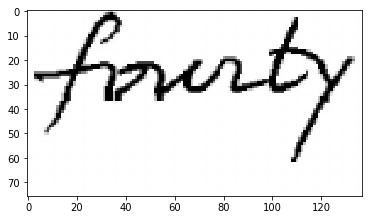

In [6]:
plot.imshow(image_of_word)
plot.show()

In [51]:
image_of_word.shape

(76L, 137L, 3L)

In [95]:
(image_of_word[:, 136])

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [254, 254, 254],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [254, 254, 254],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [254, 254, 254],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [254, 254, 254],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [254, 254, 254],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [254, 254, 254],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [254, 254

In [89]:

benchmark_black = [50, 50, 50]
def calculate_stroke_width(image): 
    #each row of pixels 
    all_stroke_widths = []
    all_stroke_locations = []
    for row_index, row in enumerate(image):
        running_stroke = False
        current_width = 0
        pixel_indices = []
        for column_index, column in enumerate(row): 
            if (column[0] <= benchmark_black[0] and column[1] <= benchmark_black[1] and column[2] <= benchmark_black[2]):
                running_stroke = True
                current_width = current_width + 1
                pixel_indices.append((row_index, column_index))
            else: 
                if(current_width > 0):
                    all_stroke_widths.append(current_width)
                    all_stroke_locations.append(deepcopy(pixel_indices))
                    current_width = 0
                    pixel_indices = []
                running_stroke = False
        if(current_width > 0):
            all_stroke_widths.append(current_width)
            all_stroke_locations.append(deepcopy(pixel_indices))
            current_width = 0
    return all_stroke_widths, all_stroke_locations
                    
all_stroke_widths, all_stroke_width_locations = calculate_stroke_width(image_of_word)

In [90]:
 all_stroke_widths = pandas.DataFrame(all_stroke_widths)

In [91]:
all_stroke_widths.mean()

0    2.773504
dtype: float64

In [92]:
#now calculate the length-wise stroke

[[(1, 34)],
 [(2, 31), (2, 32), (2, 33), (2, 34), (2, 35), (2, 36)],
 [(3, 30), (3, 31), (3, 32), (3, 33), (3, 34), (3, 35), (3, 36)],
 [(3, 110)],
 [(4, 30), (4, 31)],
 [(4, 36), (4, 37)],
 [(4, 109), (4, 110)],
 [(5, 28), (5, 29), (5, 30)],
 [(5, 37)],
 [(5, 109), (5, 110)],
 [(6, 28), (6, 29)],
 [(6, 36), (6, 37)],
 [(6, 108), (6, 109), (6, 110)],
 [(7, 27), (7, 28)],
 [(7, 36)],
 [(7, 107), (7, 108), (7, 109), (7, 110)],
 [(8, 27), (8, 28)],
 [(8, 36)],
 [(8, 107), (8, 108)],
 [(9, 26), (9, 27), (9, 28)],
 [(9, 35)],
 [(9, 107), (9, 108)],
 [(10, 25), (10, 26), (10, 27)],
 [(10, 34)],
 [(10, 106), (10, 107)],
 [(11, 25), (11, 26)],
 [(11, 33)],
 [(11, 106), (11, 107)],
 [(12, 25), (12, 26)],
 [(12, 31), (12, 32)],
 [(12, 105), (12, 106), (12, 107)],
 [(13, 24), (13, 25)],
 [(13, 105), (13, 106)],
 [(14, 24), (14, 25)],
 [(14, 105), (14, 106)],
 [(15, 23), (15, 24)],
 [(15, 104), (15, 105), (15, 106)],
 [(16, 22), (16, 23)],
 [(16, 101),
  (16, 102),
  (16, 103),
  (16, 104),
  (16,

In [96]:
def calculate_stroke_height(image): 
    all_stroke_height = []
    all_stroke_locations = []
    for column_index in range(0, (image.shape[1])): #loop through each column
        running_stroke = False
        current_height = 0
        pixel_indices = []
        column = image[:,column_index]
        for row_index in enumerate(column): 
            if (column[0] <= benchmark_black[0] and column[1] <= benchmark_black[1] and column[2] <= benchmark_black[2]):
                running_stroke = True
                current_height = current_height + 1
                pixel_indices.append((row_index, column_index))
            else: 
                if(current_height > 0):
                    all_stroke_height.append(current_height)
                    all_stroke_locations.append(deepcopy(pixel_indices))
                    current_height = 0
                    pixel_indices = []
                running_stroke = False
        if(current_height > 0):
            all_stroke_height.append(current_width)
            all_stroke_locations.append(deepcopy(pixel_indices))
            current_height = 0
    return all_stroke_height, all_stroke_locations
                    
all_stroke_height, all_stroke_height_locations = calculate_stroke_width(image_of_word)

In [97]:
all_stroke_height

[1,
 6,
 7,
 1,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 3,
 2,
 1,
 4,
 2,
 1,
 2,
 3,
 1,
 2,
 3,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 13,
 2,
 7,
 8,
 2,
 3,
 4,
 2,
 3,
 3,
 2,
 6,
 3,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 2,
 2,
 9,
 12,
 2,
 1,
 1,
 2,
 3,
 1,
 10,
 3,
 9,
 4,
 3,
 1,
 1,
 2,
 3,
 2,
 8,
 2,
 5,
 2,
 2,
 3,
 1,
 1,
 2,
 2,
 2,
 8,
 1,
 2,
 2,
 2,
 4,
 2,
 1,
 2,
 2,
 1,
 11,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 2,
 2,
 3,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 2,
 3,
 2,
 6,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 4,
 3,
 3,
 4,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 7,
 3,
 6,
 3,
 2,
 3,
 2,
 6,
 8,
 8,
 8,
 2,
 2,
 3,
 5,
 7,
 7,
 6,
 6,
 2,
 2,
 3,
 4,
 5,
 2,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2]